In [2]:
import pandas as pd

# Load data
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)

# Display the first few rows
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:

# Load data
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
df = pd.read_csv(url)

# Print column names
print(df.columns)

# Remove nulls, convert time formats, encode categorical features
if 'total_bill' in df.columns:  # Replace with actual column name
    df.dropna(subset=['total_bill'], inplace=True)
else:
    print("Column not found")

# Perform other operations based on actual column names

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


Text(0.5, 1.0, 'Accident Severity Distribution')

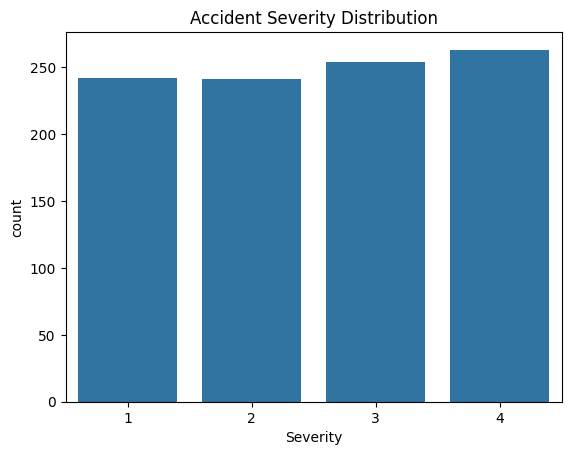

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Accident severity distribution
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')


In [18]:

import pandas as pd
import numpy as np

# Create a sample DataFrame
np.random.seed(0)
data = {
    'Hour': np.random.randint(0, 24, size=100),
    'Weather_Condition': np.random.choice(['Sunny', 'Rainy', 'Cloudy'], size=100),
    'Visibility(mi)': np.random.uniform(0, 10, size=100),
    'Temperature(F)': np.random.uniform(32, 100, size=100),
    'Severity': np.random.choice([1, 2, 3, 4], size=100)
}
df = pd.DataFrame(data)

# Define features and labels
features = df[['Hour', 'Weather_Condition', 'Visibility(mi)', 'Temperature(F)']]
labels = df['Severity']

# Encode categories
features = pd.get_dummies(features, columns=['Weather_Condition'])

print(features.head())
print(labels.head())

   Hour  Visibility(mi)  Temperature(F)  Weather_Condition_Cloudy  \
0    12        6.063932       96.789833                     False   
1    15        0.191932       78.749203                     False   
2    21        3.015748       46.654522                     False   
3     0        6.601735       96.421200                     False   
4     3        2.900776       81.698195                     False   

   Weather_Condition_Rainy  Weather_Condition_Sunny  
0                     True                    False  
1                     True                    False  
2                     True                    False  
3                    False                     True  
4                     True                    False  
0    2
1    2
2    4
3    2
4    3
Name: Severity, dtype: int64


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.08      0.33      0.12         3
           2       0.14      0.17      0.15         6
           3       0.67      0.17      0.27        12
           4       0.29      0.22      0.25         9

    accuracy                           0.20        30
   macro avg       0.29      0.22      0.20        30
weighted avg       0.39      0.20      0.22        30



In [20]:

# Predicting severity based on input
sample_input = pd.DataFrame([{
    'Hour': 8,
    'Weather_Condition_Clear': 1,
    'Visibility(mi)': 10.0,
    'Temperature(F)': 65
}])
sample_input = sample_input.reindex(columns=features.columns, fill_value=0)

predicted_severity = model.predict(sample_input)
print("Predicted Accident Severity:", predicted_severity[0])

Predicted Accident Severity: 2


In [21]:


import pandas as pd
import numpy as np
import folium

# Create a sample DataFrame
np.random.seed(0)
data = {
    'Start_Lat': np.random.uniform(30, 50, size=1000),
    'Start_Lng': np.random.uniform(-120, -80, size=1000),
    'Severity': np.random.choice([1, 2, 3, 4], size=1000)
}
df = pd.DataFrame(data)

# Create map
map = folium.Map(location=[df['Start_Lat'].mean(), df['Start_Lng'].mean()], zoom_start=5)

# Add markers
for _, row in df.sample(100).iterrows():
    folium.CircleMarker(
        location=[row['Start_Lat'], row['Start_Lng']],
        radius=3,
        color='red' if row['Severity'] == 4 else 'blue',
        fill=True
    ).add_to(map)

# Display map
map.save('accident_map.html')
map


In [25]:

import pandas as pd

# Show initial state
print("O Before Cleaning:")
print(df.head())
print(df.info())

# Step 1: Remove nulls from key columns
df - df.dropna(subset=['Severity' ])

# Step 2: No datetime conversion needed

# Step 3: No categorical variables to encode

# Step 4: Remove duplicates
df = df.drop_duplicates()

# Show cleaned state
print(" After Cleaning:")
print(df.head())
print(df.info())

O Before Cleaning:
   Start_Lat   Start_Lng  Severity
0  40.976270  -96.284789         4
1  44.303787 -119.597452         4
2  42.055268 -100.966952         4
3  40.897664  -91.649184         4
4  38.473096 -118.240983         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Start_Lat  1000 non-null   float64
 1   Start_Lng  1000 non-null   float64
 2   Severity   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB
None
 After Cleaning:
   Start_Lat   Start_Lng  Severity
0  40.976270  -96.284789         4
1  44.303787 -119.597452         4
2  42.055268 -100.966952         4
3  40.897664  -91.649184         4
4  38.473096 -118.240983         2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  ----- 

<ipython-input-26-ac3a20027eb7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Severity', palette='Set2')


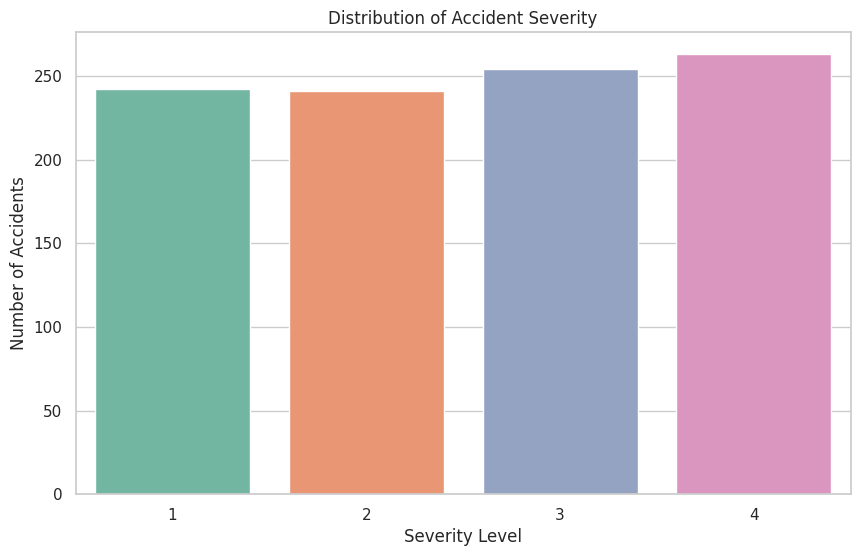

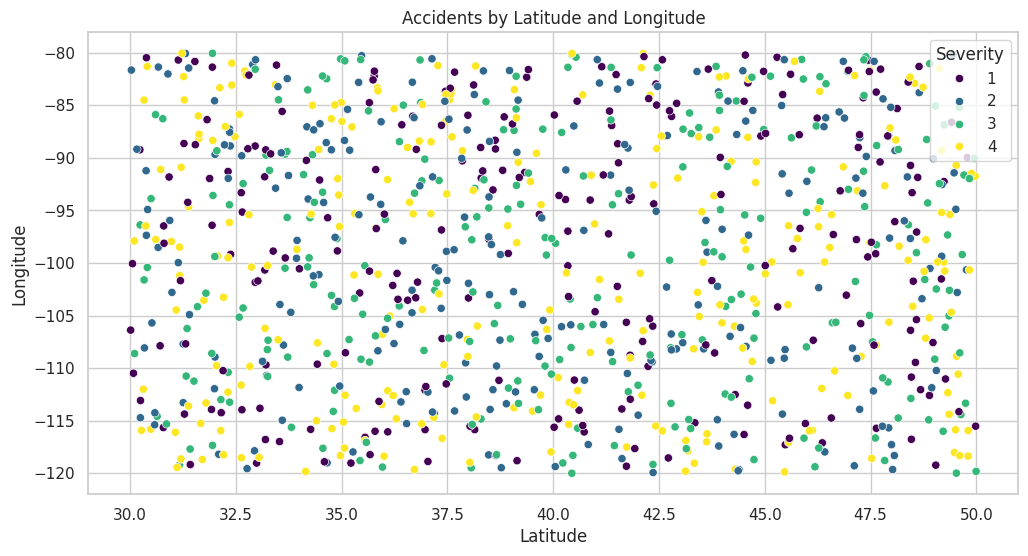

<ipython-input-26-ac3a20027eb7>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity', data=df, palette='viridis')


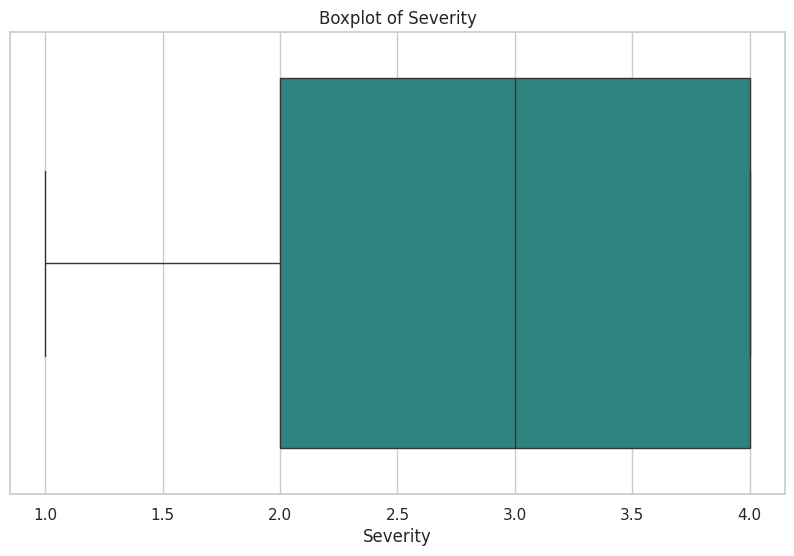

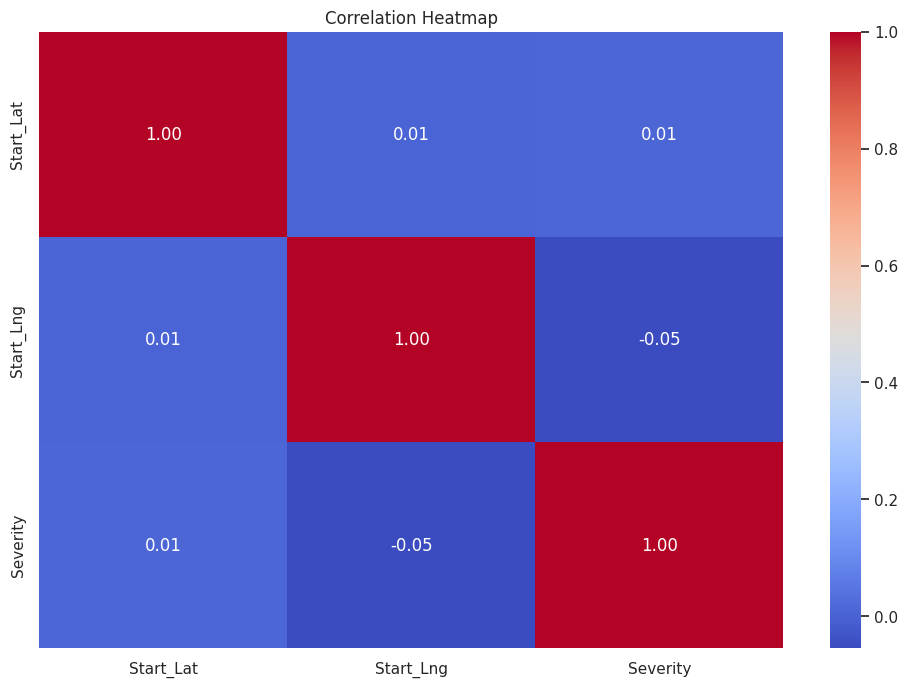

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# 1. Severity Distribution
plt.figure(figsize=(10, 6))
plt.title("Distribution of Accident Severity")
sns.countplot(data=df, x='Severity', palette='Set2')
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()

# Since 'Start_Time' doesn't exist, we'll skip the hour plot

# 2. Severity vs Latitude and Longitude
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Start_Lat', y='Start_Lng', hue='Severity', data=df, palette='viridis')
plt.title("Accidents by Latitude and Longitude")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt. show()

# 3. Severity Distribution Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', data=df, palette='viridis')
plt.title("Boxplot of Severity")
plt.show()

# 4. Heatmap: Correlation
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt. show()

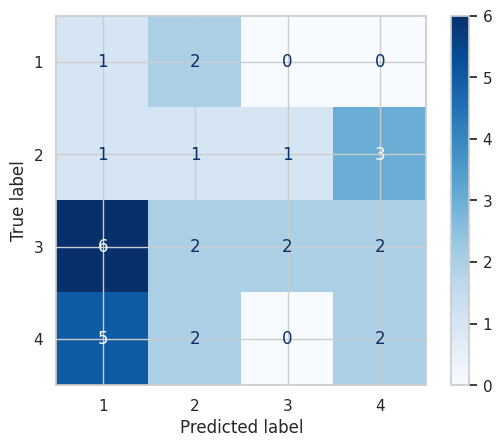

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

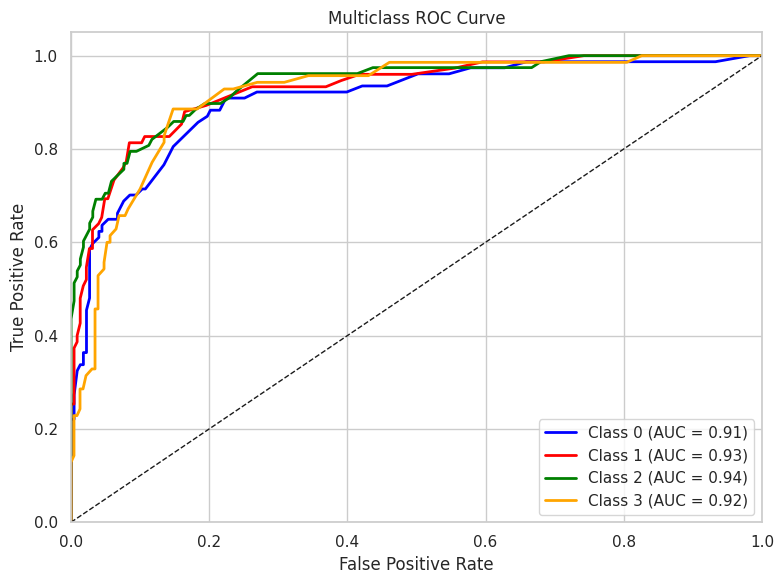

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate synthetic data for 4 classes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=10, random_state=42)

# Binarize the output for ROC
y_bin = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest with One-vs-Rest strategy
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=42))
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()